In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import cv2
from skimage.transform import resize
from skimage.io import imread
from sklearn.utils import shuffle
import random
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from PIL import Image as im

### Loading Images

In [10]:
Categories=['rock','paper','scissors']
train_dir = 'rps-split\\train'
test_dir = 'rps-split\\test'
val_dir = 'rps-split\\val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


In [3]:
x_train.shape

(1531, 22500)

In [4]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,0.282439,0.289924,0.293366,0.300145,0.303655,0.308242,0.314224,0.317845,0.324846,0.325541,...,0.309310,0.307258,0.305002,0.299647,0.298464,0.293929,0.289883,0.283850,0.283182,0.269569
1,0.307829,0.299331,0.296886,0.301255,0.296857,0.306606,0.309610,0.308545,0.304403,0.308739,...,0.333674,0.332998,0.328856,0.331649,0.324068,0.326655,0.321872,0.321227,0.318055,0.321791
2,0.259973,0.268775,0.275280,0.280152,0.285039,0.285782,0.288814,0.292053,0.299367,0.303309,...,0.289264,0.288739,0.285866,0.280724,0.279225,0.273654,0.267650,0.263894,0.262009,0.252174
3,0.306726,0.303777,0.305048,0.305458,0.303881,0.309817,0.311885,0.309504,0.310891,0.314309,...,0.334475,0.337161,0.331765,0.335954,0.328828,0.325748,0.328762,0.326534,0.322945,0.324864
4,0.216188,0.223491,0.231423,0.240872,0.241220,0.249937,0.252278,0.255959,0.261174,0.265196,...,0.228960,0.225911,0.219907,0.219417,0.212889,0.205368,0.205186,0.201541,0.197776,0.189999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,0.316758,0.319122,0.315090,0.317579,0.319337,0.326543,0.325820,0.322612,0.325771,0.332192,...,0.344872,0.343667,0.348252,0.339113,0.332841,0.333563,0.330319,0.335869,0.335691,0.332603
1527,0.382267,0.381571,0.378451,0.383468,0.384683,0.388388,0.387331,0.394883,0.393906,0.397792,...,0.425765,0.420005,0.422743,0.420270,0.416993,0.414020,0.414914,0.414313,0.415321,0.415032
1528,0.293139,0.287507,0.286387,0.289640,0.288580,0.296019,0.298054,0.285896,0.290841,0.299751,...,0.316646,0.314835,0.314268,0.311509,0.305610,0.309481,0.307940,0.304920,0.302529,0.301563
1529,0.304618,0.297201,0.304142,0.305809,0.306728,0.308514,0.317587,0.312711,0.313207,0.312118,...,0.332991,0.327786,0.325019,0.329533,0.324487,0.320900,0.321537,0.317153,0.316885,0.318734


In [5]:
y_train

0       1
1       0
2       0
3       2
4       1
       ..
1526    2
1527    2
1528    1
1529    2
1530    2
Name: Target, Length: 1531, dtype: int32

### Searching for best-performing model on training set

In [146]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
#param_grid={'C':[0.1],'gamma':[0.0001],'kernel':['rbf','poly']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.342 total time=  32.1s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=  30.8s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=  30.4s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=  41.5s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=  33.5s
[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.342 total time=  26.5s
[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.343 total time=  24.0s
[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.343 total time=  20.9s
[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.343 total time=  23.4s
[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.343 total time=  21.1s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.704 total time=  32.7s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.392 total time=  32.3s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.395 total time=  36.6s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.392 total time=  31.5s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.363 total time=  30.5s
[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.844 total time=  10.2s
[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.824 total time=  15.9s
[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.827 total time=  14.5s
[CV 4/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.837 total time=  16.3s
[CV 5/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.850 total time=   9.4s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.342 total time=  28.8s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.343 total time=  27.1s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.343 total time=  32.2s
[CV 4/5] END .........C=10, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [147]:
print(model.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [14]:
param_grid={'C':[10,100,1000],'gamma':[0.001],'kernel':['rbf','poly'],'degree':[3,4,5]}
#param_grid={'C':[0.1],'gamma':[0.0001],'kernel':['rbf','poly']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.889 total time=  18.5s
[CV 2/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.902 total time=  15.5s
[CV 3/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.915 total time=  15.7s
[CV 4/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.908 total time=  15.6s
[CV 5/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.902 total time=  15.5s
[CV 1/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.844 total time=  10.5s
[CV 2/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.824 total time=  13.1s
[CV 3/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.827 total time=  11.7s
[CV 4/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.837 total time=  12.6s
[CV 5/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.850 total time=  10.5s
[CV 1/5] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.889 total t

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'degree': [3, 4, 5],
                         'gamma': [0.001], 'kernel': ['rbf', 'poly']},
             verbose=3)

In [15]:
print(model.best_params_)

{'C': 100, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}


In [34]:
param_grid={'C':[0.1,1,10,100,1000],'kernel':['linear']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.733 total time=  12.9s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.696 total time=  10.8s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.739 total time=  10.6s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.686 total time=  10.7s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.709 total time=  10.2s
[CV 1/5] END ................C=1, kernel=linear;, score=0.658 total time=  12.7s
[CV 2/5] END ................C=1, kernel=linear;, score=0.683 total time=  13.7s
[CV 3/5] END ................C=1, kernel=linear;, score=0.683 total time=  11.8s
[CV 4/5] END ................C=1, kernel=linear;, score=0.647 total time=  12.7s
[CV 5/5] END ................C=1, kernel=linear;, score=0.683 total time=  12.6s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.658 total time=  12.3s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

### RBF with c=100, gamma=0.001 performs best on training set
### Changing polynomial dimensions does not have significant impact on training accuracy

In [6]:
best_train_model = svm.SVC(kernel='rbf', gamma=0.001, C=100).fit(x_train, y_train)

In [7]:
#model.fit(x_train,y_train)
y_pred=best_train_model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
#print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 0 1 1 1 2 1 0 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 0
 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [56]:
def test_score(trained_model):
    pred_y = trained_model.predict(x_test)
    print(confusion_matrix(y_test,pred_y))
    print(classification_report(y_test,pred_y))
    
def train_score(trained_model):
    pred_y = trained_model.predict(x_train)
    print(confusion_matrix(y_train,pred_y))
    print(classification_report(y_train,pred_y))
    
def val_score(trained_model):
    pred_y = trained_model.predict(x_val)
    print(confusion_matrix(y_val,pred_y))
    print(classification_report(y_val,pred_y))

In [13]:
#C=100, gamma=0.001, kernel=rbf
val_score(best_train_model)

[[ 98   3   8]
 [  4  92  11]
 [  3   1 108]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       109
           1       0.96      0.86      0.91       107
           2       0.85      0.96      0.90       112

    accuracy                           0.91       328
   macro avg       0.91      0.91      0.91       328
weighted avg       0.91      0.91      0.91       328



In [14]:
train_score(best_train_model)

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



### Testing alternative models

In [15]:
val_score(svm.SVC(C=1000,kernel='rbf',gamma=0.001).fit(x_train, y_train))

[[ 98   3   8]
 [  4  92  11]
 [  3   1 108]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       109
           1       0.96      0.86      0.91       107
           2       0.85      0.96      0.90       112

    accuracy                           0.91       328
   macro avg       0.91      0.91      0.91       328
weighted avg       0.91      0.91      0.91       328



In [16]:
#C=0.1, gamma=0.001, kernel=poly
val_score(svm.SVC(C=0.1, kernel='poly').fit(x_train, y_train))

[[97  3  9]
 [10 88  9]
 [10  5 97]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       109
           1       0.92      0.82      0.87       107
           2       0.84      0.87      0.85       112

    accuracy                           0.86       328
   macro avg       0.86      0.86      0.86       328
weighted avg       0.86      0.86      0.86       328



In [17]:
val_score(svm.SVC(C=1, kernel='poly').fit(x_train, y_train))

[[98  4  7]
 [10 88  9]
 [10  4 98]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.92      0.82      0.87       107
           2       0.86      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [18]:
val_score(svm.SVC(C=10, kernel='poly').fit(x_train, y_train))

[[98  4  7]
 [10 88  9]
 [10  4 98]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.92      0.82      0.87       107
           2       0.86      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [19]:
val_score(svm.SVC(C=100, kernel='poly').fit(x_train, y_train))

[[98  4  7]
 [10 88  9]
 [10  4 98]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.92      0.82      0.87       107
           2       0.86      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [20]:
val_score(svm.SVC(C=0.1, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[72 10 27]
 [10 72 25]
 [18  4 90]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       109
           1       0.84      0.67      0.75       107
           2       0.63      0.80      0.71       112

    accuracy                           0.71       328
   macro avg       0.73      0.71      0.71       328
weighted avg       0.73      0.71      0.71       328



In [21]:
train_score(svm.SVC(C=0.1, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[346  61 101]
 [ 50 323 125]
 [ 79  19 427]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       508
           1       0.80      0.65      0.72       498
           2       0.65      0.81      0.72       525

    accuracy                           0.72      1531
   macro avg       0.73      0.71      0.72      1531
weighted avg       0.73      0.72      0.72      1531



In [22]:
val_score(svm.SVC(C=1, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[85  5 19]
 [ 7 85 15]
 [12  5 95]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       109
           1       0.89      0.79      0.84       107
           2       0.74      0.85      0.79       112

    accuracy                           0.81       328
   macro avg       0.82      0.81      0.81       328
weighted avg       0.81      0.81      0.81       328



In [23]:
val_score(svm.SVC(C=10, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[ 95   3  11]
 [  5  92  10]
 [  5   2 105]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       109
           1       0.95      0.86      0.90       107
           2       0.83      0.94      0.88       112

    accuracy                           0.89       328
   macro avg       0.90      0.89      0.89       328
weighted avg       0.89      0.89      0.89       328



In [24]:
val_score(svm.SVC(C=100, degree=3, kernel='poly').fit(x_train, y_train))

[[98  4  7]
 [10 88  9]
 [10  4 98]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.92      0.82      0.87       107
           2       0.86      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [25]:
val_score(svm.SVC(C=100, degree=4, kernel='poly').fit(x_train, y_train))

[[96  4  9]
 [10 89  8]
 [ 9  4 99]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       109
           1       0.92      0.83      0.87       107
           2       0.85      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [26]:
val_score(svm.SVC(C=100, degree=5, kernel='poly').fit(x_train, y_train))

[[96  4  9]
 [10 89  8]
 [ 8  6 98]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.90      0.83      0.86       107
           2       0.85      0.88      0.86       112

    accuracy                           0.86       328
   macro avg       0.86      0.86      0.86       328
weighted avg       0.86      0.86      0.86       328



In [36]:
train_score(svm.SVC(C=100, degree=5, kernel='poly').fit(x_train, y_train))

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



In [27]:
val_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[82  5 22]
 [20 75 12]
 [24 13 75]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       109
           1       0.81      0.70      0.75       107
           2       0.69      0.67      0.68       112

    accuracy                           0.71       328
   macro avg       0.72      0.71      0.71       328
weighted avg       0.71      0.71      0.71       328



In [28]:
train_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[481  10  17]
 [  1 489   8]
 [ 12   0 513]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       508
           1       0.98      0.98      0.98       498
           2       0.95      0.98      0.97       525

    accuracy                           0.97      1531
   macro avg       0.97      0.97      0.97      1531
weighted avg       0.97      0.97      0.97      1531



### Increasing polynomial dimensions marginally improves testing accuracy

In [29]:
val_score(svm.SVC(C=0.1, gamma=0.0001, kernel='rbf').fit(x_train, y_train))

[[  1   0 108]
 [  0   0 107]
 [  0   0 112]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       109
           1       0.00      0.00      0.00       107
           2       0.34      1.00      0.51       112

    accuracy                           0.34       328
   macro avg       0.45      0.34      0.18       328
weighted avg       0.45      0.34      0.18       328



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
train_score(svm.SVC(C=0.1, gamma=0.0001, kernel='rbf').fit(x_train, y_train))

[[  3   0 505]
 [  0   0 498]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       508
           1       0.00      0.00      0.00       498
           2       0.34      1.00      0.51       525

    accuracy                           0.34      1531
   macro avg       0.45      0.34      0.17      1531
weighted avg       0.45      0.34      0.18      1531



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RBF with c=100, gamma=0.001 still the most accurate with 91-92% on testing data and 100% on training data
### c=0.001 classifies all into scissors

## Decrease image quality from 150x150 to 32x32 for better comparison to neural nets

In [11]:
Categories=['rock','paper','scissors']
train_dir = 'rps-split\\train'
test_dir = 'rps-split\\test'
val_dir = 'rps-split\\val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


In [12]:
x_train.shape

(1531, 1024)

In [13]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.300570,0.321333,0.339861,0.356015,0.368621,0.375393,0.386557,0.392265,0.396568,0.401079,...,0.366491,0.364223,0.361065,0.355037,0.347758,0.338876,0.328757,0.317450,0.305523,0.289068
1,0.305769,0.309675,0.316426,0.327396,0.332671,0.341594,0.347691,0.352916,0.357916,0.363374,...,0.371226,0.368799,0.363895,0.358266,0.353350,0.345255,0.337634,0.334755,0.330602,0.322242
2,0.279768,0.298246,0.317711,0.332790,0.345631,0.352844,0.363831,0.369659,0.374380,0.378595,...,0.352845,0.349581,0.346031,0.339196,0.330828,0.320949,0.309510,0.298604,0.285769,0.269304
3,0.309114,0.312441,0.320083,0.330972,0.337421,0.344661,0.348730,0.355505,0.360473,0.367050,...,0.369720,0.368379,0.364475,0.357779,0.353295,0.345417,0.341060,0.337860,0.332617,0.324913
4,0.238294,0.259614,0.275919,0.290672,0.297517,0.306122,0.314081,0.321606,0.325926,0.328438,...,0.252287,0.253382,0.257844,0.265044,0.265494,0.258059,0.249070,0.238190,0.221616,0.203713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,0.320905,0.328758,0.336999,0.347664,0.354435,0.363455,0.368484,0.373455,0.379199,0.384777,...,0.386852,0.385306,0.381406,0.377614,0.370012,0.362756,0.356964,0.349564,0.344221,0.338484
1527,0.389369,0.392769,0.389571,0.386150,0.392524,0.402755,0.406559,0.410655,0.418259,0.437901,...,0.456071,0.454156,0.450985,0.448131,0.443195,0.436381,0.431848,0.426035,0.423116,0.421126
1528,0.292997,0.296107,0.303562,0.315029,0.321099,0.329147,0.333897,0.339125,0.344243,0.350723,...,0.356617,0.356413,0.350368,0.343588,0.339844,0.331346,0.324399,0.320611,0.314091,0.307539
1529,0.308246,0.313464,0.319537,0.331429,0.337286,0.345225,0.350081,0.354131,0.357728,0.363382,...,0.369423,0.367132,0.361423,0.354030,0.349208,0.340947,0.335438,0.333584,0.329611,0.323610


In [14]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.342 total time=   2.5s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   2.5s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   2.5s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   2.5s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   2.4s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.342 total time=   2.5s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.343 total time=   2.5s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.343 total time=   2.4s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.343 total time=   2.4s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.343 total time=   2.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=   2.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1], 'kernel': ['rbf']},
             verbose=3)

In [23]:
print(model.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [24]:
param_grid={'C':[0.1,1,10,100],'degree':[3,4,5],'kernel':['poly']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.853 total time=   0.5s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.846 total time=   0.6s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.846 total time=   0.6s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.846 total time=   0.6s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.863 total time=   0.6s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.863 total time=   0.5s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;, score=0.859 total time=   0.5s
[CV 3/5] END ......C=0.1, degree=4, kernel=poly;, score=0.843 total time=   0.5s
[CV 4/5] END ......C=0.1, degree=4, kernel=poly;, score=0.876 total time=   0.5s
[CV 5/5] END ......C=0.1, degree=4, kernel=poly;, score=0.876 total time=   0.5s
[CV 1/5] END ......C=0.1, degree=5, kernel=poly;, score=0.857 total time=   0.5s
[CV 2/5] END ......C=0.1, degree=5, kernel=poly;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'kernel': ['poly']},
             verbose=3)

In [25]:
print(model.best_params_)

{'C': 0.1, 'degree': 5, 'kernel': 'poly'}


### Compare with linear kernel

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'kernel':['linear']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

### Lower-quality images: best gamma 0.1 instead of 0.001, best C 10 instead of 100

In [34]:
val_score(svm.SVC(C=10, gamma=0.1, kernel='rbf').fit(x_train, y_train))

[[101   2   6]
 [  4  94   9]
 [  3   1 108]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       109
           1       0.97      0.88      0.92       107
           2       0.88      0.96      0.92       112

    accuracy                           0.92       328
   macro avg       0.93      0.92      0.92       328
weighted avg       0.93      0.92      0.92       328



In [44]:
train_score(svm.SVC(C=10, gamma=0.1, kernel='rbf').fit(x_train, y_train))

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



In [39]:
test_score(svm.SVC(kernel='rbf', gamma=0.1, C=10).fit(x_train, y_train))

[[102   0   7]
 [  3  98   6]
 [  5   2 106]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       109
           1       0.98      0.92      0.95       107
           2       0.89      0.94      0.91       113

    accuracy                           0.93       329
   macro avg       0.93      0.93      0.93       329
weighted avg       0.93      0.93      0.93       329



In [36]:
val_score(svm.SVC(C=10, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[76  8 25]
 [10 77 20]
 [16  9 87]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       109
           1       0.82      0.72      0.77       107
           2       0.66      0.78      0.71       112

    accuracy                           0.73       328
   macro avg       0.74      0.73      0.73       328
weighted avg       0.74      0.73      0.73       328



In [37]:
val_score(svm.SVC(C=100, gamma=0.1, kernel='rbf').fit(x_train, y_train))

[[101   2   6]
 [  4  94   9]
 [  3   1 108]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       109
           1       0.97      0.88      0.92       107
           2       0.88      0.96      0.92       112

    accuracy                           0.92       328
   macro avg       0.93      0.92      0.92       328
weighted avg       0.93      0.92      0.92       328



In [45]:
test_score(svm.SVC(C=100, gamma=0.1, kernel='rbf').fit(x_train, y_train))

[[102   0   7]
 [  3  98   6]
 [  5   2 106]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       109
           1       0.98      0.92      0.95       107
           2       0.89      0.94      0.91       113

    accuracy                           0.93       329
   macro avg       0.93      0.93      0.93       329
weighted avg       0.93      0.93      0.93       329



In [35]:
train_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[406  38  64]
 [ 39 369  90]
 [ 62  29 434]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       508
           1       0.85      0.74      0.79       498
           2       0.74      0.83      0.78       525

    accuracy                           0.79      1531
   macro avg       0.80      0.79      0.79      1531
weighted avg       0.79      0.79      0.79      1531



In [40]:
val_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[83  4 22]
 [14 78 15]
 [14 11 87]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       109
           1       0.84      0.73      0.78       107
           2       0.70      0.78      0.74       112

    accuracy                           0.76       328
   macro avg       0.76      0.76      0.76       328
weighted avg       0.76      0.76      0.76       328



In [41]:
test_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[89  4 16]
 [ 9 73 25]
 [17 10 86]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       109
           1       0.84      0.68      0.75       107
           2       0.68      0.76      0.72       113

    accuracy                           0.75       329
   macro avg       0.76      0.75      0.75       329
weighted avg       0.76      0.75      0.75       329



In [32]:
train_score(svm.SVC(C=1, kernel='linear').fit(x_train, y_train))

[[442  24  42]
 [ 22 436  40]
 [ 48  19 458]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       508
           1       0.91      0.88      0.89       498
           2       0.85      0.87      0.86       525

    accuracy                           0.87      1531
   macro avg       0.87      0.87      0.87      1531
weighted avg       0.87      0.87      0.87      1531



In [33]:
val_score(svm.SVC(C=1, kernel='linear').fit(x_train, y_train))

[[85  4 20]
 [13 77 17]
 [17 11 84]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       109
           1       0.84      0.72      0.77       107
           2       0.69      0.75      0.72       112

    accuracy                           0.75       328
   macro avg       0.76      0.75      0.75       328
weighted avg       0.76      0.75      0.75       328



In [34]:
test_score(svm.SVC(C=1, kernel='linear').fit(x_train, y_train))

[[93  4 12]
 [11 77 19]
 [20 13 80]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       109
           1       0.82      0.72      0.77       107
           2       0.72      0.71      0.71       113

    accuracy                           0.76       329
   macro avg       0.76      0.76      0.76       329
weighted avg       0.76      0.76      0.76       329



In [53]:
train_score(svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train))

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



In [42]:
val_score(svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train))

[[95  6  8]
 [ 9 90  8]
 [ 8  6 98]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       109
           1       0.88      0.84      0.86       107
           2       0.86      0.88      0.87       112

    accuracy                           0.86       328
   macro avg       0.86      0.86      0.86       328
weighted avg       0.86      0.86      0.86       328



In [43]:
test_score(svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train))

[[104   1   4]
 [  4  94   9]
 [ 11   7  95]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       109
           1       0.92      0.88      0.90       107
           2       0.88      0.84      0.86       113

    accuracy                           0.89       329
   macro avg       0.89      0.89      0.89       329
weighted avg       0.89      0.89      0.89       329



### Slightly higher accuracy with lower-quality images (93% test/train, 92% val)

### Show first image in dataset

In [55]:
from PIL import Image as im

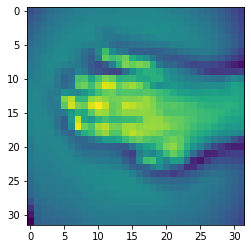

In [59]:
first_image = np.array(x_train.T[0])
first_image = np.reshape(first_image, (32, 32))
plt.imshow(first_image)

In [14]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,0.327006,0.318834,0.323973,0.330377,0.326415,0.328089,0.337242,0.328654,0.329932,0.333666,...,0.331515,0.333384,0.330452,0.328314,0.322628,0.322367,0.322702,0.319377,0.313815,0.311721
1,0.315090,0.305533,0.310188,0.315768,0.307949,0.315844,0.323197,0.314478,0.315038,0.322184,...,0.334386,0.335710,0.333242,0.332373,0.327756,0.329524,0.329309,0.326194,0.321476,0.322470
2,0.359144,0.358328,0.355936,0.361630,0.362130,0.367018,0.364811,0.367274,0.365174,0.369566,...,0.389686,0.390984,0.386920,0.378935,0.370978,0.372878,0.372166,0.370863,0.374950,0.382550
3,0.401388,0.402302,0.398677,0.402693,0.402017,0.407019,0.412162,0.412566,0.407532,0.412417,...,0.428547,0.426874,0.428182,0.419629,0.410377,0.412099,0.416260,0.418466,0.418462,0.417367
4,0.258747,0.268818,0.276975,0.280129,0.289476,0.297191,0.295294,0.301408,0.307391,0.307857,...,0.201299,0.202054,0.200099,0.194811,0.192479,0.185021,0.179744,0.177956,0.173525,0.164161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.346733,0.351356,0.343962,0.347722,0.348351,0.350051,0.353727,0.353337,0.352340,0.356897,...,0.373575,0.370718,0.373009,0.367935,0.363422,0.359693,0.359442,0.360760,0.364004,0.364267
325,0.311937,0.303902,0.306983,0.313511,0.315812,0.320161,0.324157,0.318960,0.322235,0.322686,...,0.324158,0.326775,0.327040,0.322469,0.312277,0.313013,0.314554,0.308421,0.308911,0.311173
326,0.387385,0.390794,0.392158,0.391510,0.392019,0.394232,0.397026,0.396776,0.396274,0.401210,...,0.418971,0.415215,0.422798,0.414337,0.404071,0.405130,0.406824,0.407180,0.413245,0.412668
327,0.300849,0.298772,0.295340,0.303790,0.302127,0.305902,0.306402,0.310475,0.310777,0.310876,...,0.325296,0.325342,0.322559,0.315430,0.313968,0.316459,0.316828,0.317484,0.319236,0.319784


### Compare misclassified and correctly classified images

In [17]:
best_model = svm.SVC(kernel='rbf', gamma=0.1, C=10).fit(x_train, y_train)
pred_test = best_model.predict(x_test)
missclassified_indices = []
for i in range(0,y_test.size):
    if y_test[i] != pred_test[i]:
        missclassified_indices.append(i)

In [20]:
missclassified_indices

[27,
 29,
 41,
 77,
 85,
 87,
 93,
 113,
 126,
 134,
 138,
 140,
 144,
 152,
 156,
 212,
 219,
 229,
 231,
 252,
 261,
 273,
 302]

Predicted class 2
Actual class 0


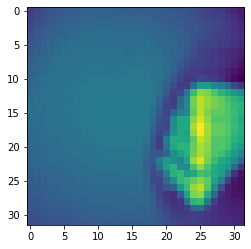

In [21]:
plt.imshow(np.reshape(np.array(x_test.T[77]), (32, 32)))
print("Predicted class",pred_test[77])
print("Actual class",y_test[77])

Predicted class 0
Actual class 0


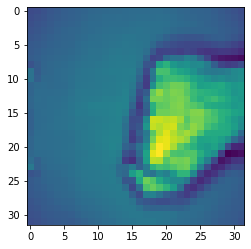

In [22]:
plt.imshow(np.reshape(np.array(x_test.T[78]), (32, 32)))
print("Predicted class",pred_test[78])
print("Actual class",y_test[78])

Predicted class 2
Actual class 1


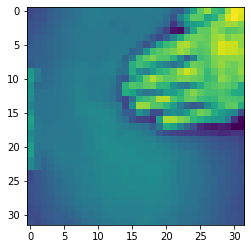

In [23]:
plt.imshow(np.reshape(np.array(x_test.T[152]), (32, 32)))
print("Predicted class",pred_test[152])
print("Actual class",y_test[152])

Predicted class 1
Actual class 1


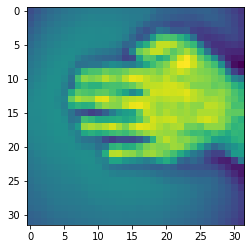

In [24]:
plt.imshow(np.reshape(np.array(x_test.T[153]), (32, 32)))
print("Predicted class",pred_test[153])
print("Actual class",y_test[153])

Predicted class 0
Actual class 2


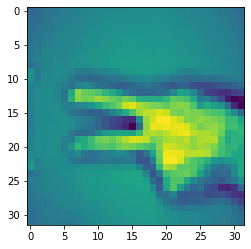

In [25]:
plt.imshow(np.reshape(np.array(x_test.T[231]), (32, 32)))
print("Predicted class",pred_test[231])
print("Actual class",y_test[231])

Predicted class 2
Actual class 2


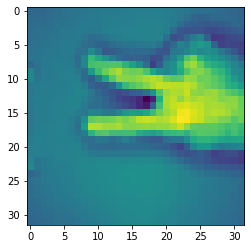

In [26]:
plt.imshow(np.reshape(np.array(x_test.T[232]), (32, 32)))
print("Predicted class",pred_test[232])
print("Actual class",y_test[232])

### Test model on new dataset: 3 images of my own hand from each class

In [18]:
Categories=['rock','paper','scissors']
self_test_dir = 'rps-self'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(self_test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
self_test=df.iloc[:,:-1] #input data
y_self_test=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train


In [19]:
self_test

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.178039,0.182196,0.165139,0.172490,0.176392,0.166528,0.174237,0.190188,0.197409,0.186793,...,0.140960,0.133996,0.109639,0.111961,0.111690,0.111101,0.112002,0.107377,0.101553,0.113385
1,0.143245,0.153305,0.164382,0.168630,0.161523,0.167237,0.162833,0.183976,0.197247,0.183611,...,0.090048,0.092607,0.085328,0.089864,0.098328,0.087142,0.094777,0.100788,0.104504,0.107505
2,0.176348,0.201244,0.195703,0.200994,0.195285,0.198313,0.202585,0.227009,0.236194,0.218017,...,0.150978,0.154657,0.170402,0.172479,0.163641,0.151358,0.144133,0.143959,0.132867,0.109082
3,0.156532,0.170136,0.183074,0.169675,0.160600,0.173977,0.175296,0.179433,0.198849,0.203328,...,0.185190,0.177184,0.180812,0.161494,0.173493,0.170275,0.146008,0.166176,0.182307,0.172834
4,0.176548,0.178792,0.208152,0.189680,0.181414,0.171399,0.187340,0.193791,0.206729,0.202104,...,0.175421,0.174297,0.179069,0.159136,0.144950,0.156650,0.155396,0.171002,0.189619,0.178380
5,0.218505,0.194592,0.182571,0.211803,0.201469,0.186450,0.182295,0.201280,0.196275,0.223188,...,0.201933,0.188073,0.194983,0.187534,0.169350,0.191301,0.164963,0.150963,0.180181,0.181682
6,0.229906,0.226549,0.223941,0.266388,0.253189,0.241487,0.230407,0.228665,0.220661,0.252231,...,0.226982,0.239590,0.207875,0.192654,0.205396,0.207685,0.232830,0.221853,0.192103,0.216310
7,0.223898,0.237708,0.232963,0.256087,0.248619,0.251376,0.275604,0.259643,0.252373,0.256310,...,0.227808,0.241162,0.234708,0.247154,0.233753,0.234250,0.244511,0.215764,0.243997,0.262670
8,0.213048,0.228964,0.218947,0.203342,0.212881,0.227640,0.252077,0.247121,0.233355,0.232729,...,0.243442,0.239191,0.233412,0.236160,0.203854,0.221795,0.217661,0.201253,0.211146,0.206282


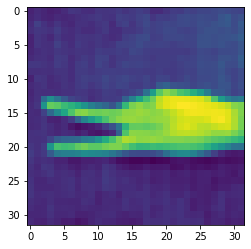

In [29]:
plt.imshow(np.reshape(np.array(self_test.T[8]), (32, 32)))

In [21]:
best_model = svm.SVC(kernel='rbf', gamma=0.1, C=10).fit(x_train, y_train)

In [22]:
best_model.predict(self_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

### RBF classifies all new images as scissors

In [30]:
poly_model = svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train)

In [31]:
poly_model.predict(self_test)

array([2, 2, 2, 0, 0, 0, 2, 2, 2])

### Polynomial model confuses rock for scissors and paper for rock

In [32]:
linear_model = svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train)

In [33]:
linear_model.predict(self_test)

array([1, 1, 1, 1, 1, 1, 1, 2, 1])

### Linear model predicts nearly all as paper

## Test Yite's images

In [4]:
Categories=['rock','paper','scissors']
self_test_dir = 'rps-self-yite'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(self_test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
self_test=df.iloc[:,:-1] #input data
y_self_test=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train


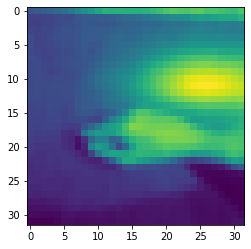

In [6]:
plt.imshow(np.reshape(np.array(self_test.T[1]), (32, 32)))

In [7]:
best_model = svm.SVC(kernel='rbf', gamma=0.1, C=10).fit(x_train, y_train)
best_model.predict(self_test)

array([2, 2, 2, 2, 2])

In [8]:
poly_model = svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train)
poly_model.predict(self_test)

array([0, 1, 1, 1, 1])

In [9]:
linear_model = svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train)
linear_model.predict(self_test)

array([1, 1, 1, 1, 1])

### Test all images

In [36]:
Categories=['rock','paper','scissors']
self_test_dir = 'rps-self-all'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(self_test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
self_test=df.iloc[:,:-1] #input data
y_self_test=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train


In [40]:
best_model = svm.SVC(kernel='rbf', gamma=0.1, C=10).fit(x_train, y_train)
print('Actual',y_self_test)
print('Predicted',best_model.predict(self_test))
print(confusion_matrix(y_self_test,best_model.predict(self_test)))
print(classification_report(y_self_test,best_model.predict(self_test)))

Actual 0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
Name: Target, dtype: int32
Predicted [2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[0 0 5]
 [0 0 5]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.29      1.00      0.44         4

    accuracy                           0.29        14
   macro avg       0.10      0.33      0.15        14
weighted avg       0.08      0.29      0.13        14



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
poly_model = svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train)
poly_model.predict(self_test)
print(confusion_matrix(y_self_test,poly_model.predict(self_test)))
print(classification_report(y_self_test,poly_model.predict(self_test)))

[[1 1 3]
 [3 2 0]
 [0 1 3]]
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.50      0.40      0.44         5
           2       0.50      0.75      0.60         4

    accuracy                           0.43        14
   macro avg       0.42      0.45      0.42        14
weighted avg       0.41      0.43      0.41        14



In [43]:
linear_model = svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train)
linear_model.predict(self_test)
print(confusion_matrix(y_self_test,linear_model.predict(self_test)))
print(classification_report(y_self_test,linear_model.predict(self_test)))

[[0 5 0]
 [0 5 0]
 [0 3 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.38      1.00      0.56         5
           2       1.00      0.25      0.40         4

    accuracy                           0.43        14
   macro avg       0.46      0.42      0.32        14
weighted avg       0.42      0.43      0.31        14



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Try additional color channels and data transformation

In [19]:
import torch
import torch.nn as nn
import random
from torch import optim
from torch.optim.lr_scheduler import MultiStepLR
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import time
from sklearn.metrics import recall_score, precision_score, accuracy_score

#### Import dataset with 3 color channels

In [88]:
Categories=['rock','paper','scissors']
train_dir = 'rps-split\\train'
test_dir = 'rps-split\\test'
val_dir = 'rps-split\\val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


#### Import real data with 3 color channels

In [89]:
Categories=['rock','paper','scissors']
self_test_dir = 'rps-self-all'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(self_test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
self_test=df.iloc[:,:-1] #input data
y_self_test=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train


In [51]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.108830,0.463414,0.157114,0.124407,0.489254,0.172612,0.138039,0.513397,0.184481,0.150127,...,0.178772,0.135868,0.477676,0.169225,0.128376,0.461942,0.160699,0.117872,0.443389,0.142613
1,0.129428,0.470184,0.143679,0.131994,0.475316,0.146401,0.135608,0.484888,0.150483,0.142385,...,0.161022,0.143173,0.514002,0.157377,0.145854,0.506688,0.152899,0.145579,0.493592,0.146199
2,0.078939,0.451715,0.126664,0.092288,0.476566,0.137153,0.105979,0.501697,0.150728,0.117815,...,0.159440,0.105213,0.464285,0.150961,0.098209,0.449014,0.137307,0.087127,0.430828,0.119002
3,0.140160,0.466437,0.154236,0.139363,0.471882,0.157326,0.144727,0.480557,0.165120,0.153548,...,0.174945,0.144018,0.512511,0.172204,0.145946,0.503935,0.166650,0.143984,0.492599,0.160677
4,0.088967,0.385828,0.083938,0.102310,0.416022,0.094970,0.114495,0.438849,0.101970,0.125345,...,0.093792,0.103394,0.377319,0.086606,0.093341,0.357588,0.070008,0.081573,0.337626,0.050206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,0.146447,0.476359,0.175379,0.151458,0.486339,0.181696,0.157324,0.496879,0.187580,0.158730,...,0.187209,0.151214,0.528120,0.180376,0.152756,0.519160,0.175594,0.156123,0.509827,0.168156
1527,0.183925,0.563155,0.237095,0.187686,0.566899,0.239423,0.186889,0.563707,0.233813,0.185417,...,0.281364,0.181962,0.618131,0.274702,0.183103,0.612920,0.272439,0.186219,0.607259,0.272900
1528,0.123528,0.452343,0.134468,0.124134,0.457455,0.135964,0.130137,0.466220,0.142174,0.139311,...,0.159352,0.130332,0.493976,0.154037,0.132317,0.484625,0.144838,0.136010,0.471652,0.141260
1529,0.118283,0.469137,0.167031,0.120079,0.476526,0.171203,0.124662,0.484316,0.175231,0.135098,...,0.175046,0.127169,0.512215,0.172307,0.129316,0.505641,0.167567,0.132661,0.495388,0.160971


### 3 color channels without augmentation

In [53]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.342 total time=   5.5s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   4.5s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   4.3s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   4.2s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   4.2s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.502 total time=   4.2s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.503 total time=   4.2s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.487 total time=   3.8s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.484 total time=   3.7s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.520 total time=   3.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.619 total time=   3.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1], 'kernel': ['rbf']},
             verbose=3)

In [54]:
param_grid={'C':[0.1,1,10,100],'degree':[3,4,5],'kernel':['poly']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.964 total time=   1.2s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.964 total time=   1.3s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.948 total time=   1.4s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.944 total time=   1.3s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.935 total time=   1.2s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.974 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;, score=0.967 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=4, kernel=poly;, score=0.961 total time=   0.9s
[CV 4/5] END ......C=0.1, degree=4, kernel=poly;, score=0.944 total time=   0.9s
[CV 5/5] END ......C=0.1, degree=4, kernel=poly;, score=0.964 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=5, kernel=poly;, score=0.954 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=5, kernel=poly;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'kernel': ['poly']},
             verbose=3)

In [55]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'kernel':['linear']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.958 total time=   1.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.958 total time=   1.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.944 total time=   1.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.928 total time=   1.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.935 total time=   1.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.925 total time=   0.9s
[CV 2/5] END ................C=1, kernel=linear;, score=0.941 total time=   0.9s
[CV 3/5] END ................C=1, kernel=linear;, score=0.922 total time=   0.9s
[CV 4/5] END ................C=1, kernel=linear;, score=0.931 total time=   0.9s
[CV 5/5] END ................C=1, kernel=linear;, score=0.912 total time=   0.9s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.925 total time=   1.0s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
             verbose=3)

In [38]:
i = 0
for batch in datagen.flow(x, batch_size = 1):
    i += 1
    if i > 5:
        break

In [57]:
def test_score(trained_model):
    pred_y = trained_model.predict(x_test)
    print(confusion_matrix(y_test,pred_y))
    print(classification_report(y_test,pred_y))
    
def train_score(trained_model):
    pred_y = trained_model.predict(x_train)
    print(confusion_matrix(y_train,pred_y))
    print(classification_report(y_train,pred_y))
    
def val_score(trained_model):
    pred_y = trained_model.predict(x_val)
    print(confusion_matrix(y_val,pred_y))
    print(classification_report(y_val,pred_y))

In [58]:
train_score(svm.SVC(C=100, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[505   1   2]
 [  2 493   3]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       508
           1       1.00      0.99      0.99       498
           2       0.99      1.00      1.00       525

    accuracy                           0.99      1531
   macro avg       0.99      0.99      0.99      1531
weighted avg       0.99      0.99      0.99      1531



In [60]:
val_score(svm.SVC(C=100, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[101   2   6]
 [  8  95   4]
 [  0   1 111]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       109
           1       0.97      0.89      0.93       107
           2       0.92      0.99      0.95       112

    accuracy                           0.94       328
   macro avg       0.94      0.94      0.94       328
weighted avg       0.94      0.94      0.94       328



In [61]:
train_score(svm.SVC(C=0.1, degree=5, kernel='poly').fit(x_train, y_train))

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



In [62]:
val_score(svm.SVC(C=0.1, degree=5, kernel='poly').fit(x_train, y_train))

[[104   1   4]
 [  9  95   3]
 [  0   1 111]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       109
           1       0.98      0.89      0.93       107
           2       0.94      0.99      0.97       112

    accuracy                           0.95       328
   macro avg       0.95      0.94      0.94       328
weighted avg       0.95      0.95      0.94       328



In [63]:
train_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[500   3   5]
 [  7 478  13]
 [  2   1 522]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       508
           1       0.99      0.96      0.98       498
           2       0.97      0.99      0.98       525

    accuracy                           0.98      1531
   macro avg       0.98      0.98      0.98      1531
weighted avg       0.98      0.98      0.98      1531



In [64]:
val_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[ 98   4   7]
 [ 10  93   4]
 [  0   4 108]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       109
           1       0.92      0.87      0.89       107
           2       0.91      0.96      0.94       112

    accuracy                           0.91       328
   macro avg       0.91      0.91      0.91       328
weighted avg       0.91      0.91      0.91       328



In [65]:
test_score(svm.SVC(C=0.1, degree=5, kernel='poly').fit(x_train, y_train))

[[106   0   3]
 [  3 101   3]
 [  4   2 107]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.98      0.94      0.96       107
           2       0.95      0.95      0.95       113

    accuracy                           0.95       329
   macro avg       0.96      0.95      0.95       329
weighted avg       0.95      0.95      0.95       329



#### Real images

In [90]:
rbf_model = svm.SVC(C=100, gamma=0.001, kernel='rbf').fit(x_train, y_train)
print(confusion_matrix(y_self_test,rbf_model.predict(self_test)))
print(classification_report(y_self_test,rbf_model.predict(self_test)))

[[4 0 1]
 [2 2 1]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       1.00      0.40      0.57         5
           2       0.67      1.00      0.80         4

    accuracy                           0.71        14
   macro avg       0.78      0.73      0.70        14
weighted avg       0.79      0.71      0.69        14



In [91]:
poly_model = svm.SVC(C=0.1, degree=5, kernel='poly').fit(x_train, y_train)
print(confusion_matrix(y_self_test,poly_model.predict(self_test)))
print(classification_report(y_self_test,poly_model.predict(self_test)))

[[3 0 2]
 [4 1 0]
 [1 0 3]]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       1.00      0.20      0.33         5
           2       0.60      0.75      0.67         4

    accuracy                           0.50        14
   macro avg       0.66      0.52      0.49        14
weighted avg       0.66      0.50      0.47        14



In [92]:
linear_model = svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train)
print(confusion_matrix(y_self_test,linear_model.predict(self_test)))
print(classification_report(y_self_test,linear_model.predict(self_test)))

[[3 2 0]
 [2 3 0]
 [0 1 3]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.60      0.55         5
           2       1.00      0.75      0.86         4

    accuracy                           0.64        14
   macro avg       0.70      0.65      0.67        14
weighted avg       0.68      0.64      0.65        14



### Replace original training data with augmented data (random rotating, flipping, and zooming)

In [46]:
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline(os.path.join(train_dir,'rock'))
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(508)

p = Augmentor.Pipeline(os.path.join(train_dir,'paper'))
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(498)

p = Augmentor.Pipeline(os.path.join(train_dir,'scissors'))
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(525)

Initialised with 508 image(s) found.
Output directory set to rps-split\train\rock\output.

Processing <PIL.Image.Image image mode=RGB size=300x200 at 0x225EE8984C0>: 100%|█| 508/508 [00:03<00:00, 128.40 Samples


Initialised with 498 image(s) found.
Output directory set to rps-split\train\paper\output.

Processing <PIL.Image.Image image mode=RGB size=300x200 at 0x225E8012640>: 100%|█| 498/498 [00:03<00:00, 131.02 Samples


Initialised with 525 image(s) found.
Output directory set to rps-split\train\scissors\output.

Processing <PIL.Image.Image image mode=RGB size=300x200 at 0x225EE8A7130>: 100%|█| 525/525 [00:03<00:00, 134.00 Samples


### Note: we need to move the augmented data to a new folder separate from the original images

#### Load augmented training data and original test/val

In [93]:
Categories=['rock','paper','scissors']
train_dir = 'rps-augmented'
test_dir = 'rps-split\\test'
val_dir = 'rps-split\\val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


In [94]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.503224,0.377374,0.236031,0.518100,0.387029,0.251523,0.491603,0.357519,0.236350,0.455322,...,0.238196,0.150798,0.580239,0.234891,0.145466,0.573147,0.228163,0.148683,0.576832,0.229349
1,0.319037,0.259975,0.165347,0.326856,0.268294,0.171164,0.323741,0.263979,0.166947,0.320931,...,0.061350,0.172970,0.513009,0.062299,0.167966,0.507118,0.056535,0.166091,0.500336,0.054046
2,0.036911,0.368087,0.055811,0.056346,0.408806,0.083943,0.075098,0.445834,0.102526,0.089386,...,0.131510,0.108346,0.539049,0.129968,0.110770,0.531741,0.129751,0.119076,0.519113,0.128266
3,0.125703,0.488992,0.138961,0.121660,0.481484,0.135838,0.118317,0.473236,0.133216,0.119788,...,0.176316,0.139181,0.553542,0.190199,0.142746,0.568637,0.196002,0.136994,0.566810,0.192870
4,0.205560,0.581871,0.240154,0.203238,0.592225,0.240437,0.203349,0.599506,0.243425,0.202471,...,0.255855,0.183691,0.614382,0.251409,0.181400,0.606482,0.248135,0.181390,0.601492,0.243138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,0.136420,0.563218,0.189601,0.142850,0.567043,0.199006,0.148132,0.574208,0.201018,0.144297,...,0.156228,0.114243,0.482261,0.159717,0.118566,0.487373,0.164250,0.118335,0.479779,0.160728
1527,0.106478,0.471000,0.144794,0.109557,0.482007,0.151879,0.116003,0.493869,0.158749,0.125853,...,0.160509,0.110079,0.495676,0.158603,0.112103,0.488334,0.155059,0.112166,0.474051,0.149857
1528,0.155460,0.497195,0.154524,0.156726,0.504703,0.155792,0.157340,0.514922,0.161861,0.163627,...,0.153296,0.123685,0.497488,0.148835,0.117435,0.486279,0.140191,0.115513,0.480266,0.134979
1529,0.230357,0.567656,0.136469,0.221792,0.574477,0.136979,0.228175,0.583402,0.146335,0.232112,...,0.102411,0.126379,0.470664,0.104949,0.128950,0.464809,0.102157,0.128156,0.456268,0.096224


#### 3 colors and augmented data

In [68]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.342 total time=   5.2s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   4.2s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   4.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   4.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   4.6s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.472 total time=   4.6s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   4.4s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.474 total time=   4.2s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.526 total time=   4.1s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.471 total time=   4.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.342 total time=   3.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1], 'kernel': ['rbf']},
             verbose=3)

In [69]:
param_grid={'C':[0.1,1,10,100],'degree':[3,4,5],'kernel':['poly']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.912 total time=   2.2s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.846 total time=   2.1s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.876 total time=   2.1s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.853 total time=   1.9s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.879 total time=   2.1s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.919 total time=   1.9s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;, score=0.882 total time=   1.7s
[CV 3/5] END ......C=0.1, degree=4, kernel=poly;, score=0.905 total time=   1.7s
[CV 4/5] END ......C=0.1, degree=4, kernel=poly;, score=0.886 total time=   1.8s
[CV 5/5] END ......C=0.1, degree=4, kernel=poly;, score=0.899 total time=   1.8s
[CV 1/5] END ......C=0.1, degree=5, kernel=poly;, score=0.906 total time=   1.6s
[CV 2/5] END ......C=0.1, degree=5, kernel=poly;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'kernel': ['poly']},
             verbose=3)

In [70]:
param_grid={'C':[0.1,1,10,100],'kernel':['linear']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.837 total time=   2.1s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.761 total time=   2.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.778 total time=   2.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.755 total time=   2.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.797 total time=   2.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.779 total time=   2.3s
[CV 2/5] END ................C=1, kernel=linear;, score=0.680 total time=   2.2s
[CV 3/5] END ................C=1, kernel=linear;, score=0.680 total time=   2.3s
[CV 4/5] END ................C=1, kernel=linear;, score=0.709 total time=   2.2s
[CV 5/5] END ................C=1, kernel=linear;, score=0.690 total time=   2.3s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.726 total time=   2.4s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
             verbose=3)

In [71]:
train_score(svm.SVC(C=100, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[504   2   2]
 [  5 489   4]
 [  2   1 522]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       508
           1       0.99      0.98      0.99       498
           2       0.99      0.99      0.99       525

    accuracy                           0.99      1531
   macro avg       0.99      0.99      0.99      1531
weighted avg       0.99      0.99      0.99      1531



In [72]:
val_score(svm.SVC(C=100, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[104   1   4]
 [ 10  89   8]
 [  6   1 105]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       109
           1       0.98      0.83      0.90       107
           2       0.90      0.94      0.92       112

    accuracy                           0.91       328
   macro avg       0.91      0.91      0.91       328
weighted avg       0.91      0.91      0.91       328



In [73]:
train_score(svm.SVC(C=0.1, degree=5, kernel='poly').fit(x_train, y_train))

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



In [74]:
val_score(svm.SVC(C=0.1, degree=5, kernel='poly').fit(x_train, y_train))

[[104   3   2]
 [ 10  89   8]
 [  6   2 104]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       109
           1       0.95      0.83      0.89       107
           2       0.91      0.93      0.92       112

    accuracy                           0.91       328
   macro avg       0.91      0.90      0.90       328
weighted avg       0.91      0.91      0.91       328



In [75]:
train_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[438  10  60]
 [ 17 446  35]
 [ 39  22 464]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       508
           1       0.93      0.90      0.91       498
           2       0.83      0.88      0.86       525

    accuracy                           0.88      1531
   macro avg       0.88      0.88      0.88      1531
weighted avg       0.88      0.88      0.88      1531



In [76]:
val_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[80  3 26]
 [14 79 14]
 [18  4 90]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       109
           1       0.92      0.74      0.82       107
           2       0.69      0.80      0.74       112

    accuracy                           0.76       328
   macro avg       0.78      0.76      0.76       328
weighted avg       0.77      0.76      0.76       328



In [86]:
test_score(svm.SVC(C=100, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[104   3   2]
 [  7  96   4]
 [  7   1 105]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       109
           1       0.96      0.90      0.93       107
           2       0.95      0.93      0.94       113

    accuracy                           0.93       329
   macro avg       0.93      0.93      0.93       329
weighted avg       0.93      0.93      0.93       329



#### Real Images

In [87]:
rbf_model = svm.SVC(C=100, gamma=0.001, kernel='rbf').fit(x_train, y_train)
print(confusion_matrix(y_self_test,rbf_model.predict(self_test)))
print(classification_report(y_self_test,rbf_model.predict(self_test)))

[[0 0 5]
 [0 0 5]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.29      1.00      0.44         4

    accuracy                           0.29        14
   macro avg       0.10      0.33      0.15        14
weighted avg       0.08      0.29      0.13        14



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
poly_model = svm.SVC(C=0.1, degree=5, kernel='poly').fit(x_train, y_train)
print(confusion_matrix(y_self_test,poly_model.predict(self_test)))
print(classification_report(y_self_test,poly_model.predict(self_test)))

[[0 0 5]
 [2 0 3]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.33      1.00      0.50         4

    accuracy                           0.29        14
   macro avg       0.11      0.33      0.17        14
weighted avg       0.10      0.29      0.14        14



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
linear_model = svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train)
print(confusion_matrix(y_self_test,linear_model.predict(self_test)))
print(classification_report(y_self_test,linear_model.predict(self_test)))

[[0 0 5]
 [1 0 4]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.31      1.00      0.47         4

    accuracy                           0.29        14
   macro avg       0.10      0.33      0.16        14
weighted avg       0.09      0.29      0.13        14



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Moving from grayscale to 3 color channels improves accuracy on both dataset and real data. Augmenting images with 3 color channels performs similarly to untransformed grayscale

In [40]:
%pip install Augmentor

Note: you may need to restart the kernel to use updated packages.
